<a href="https://colab.research.google.com/github/Yashwanth-18/Mini-Project---Digit-Recognizer/blob/master/Live_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
x_train , x_test = x_train / 255.0 , x_test / 255.0
x_train = tf.keras.utils.normalize(x_train, axis=-1)
x_test = tf.keras.utils.normalize(x_test,axis=-1)
print(y_train)

[5 0 4 ... 5 6 8]


In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=512 , activation='relu'))
model.add(tf.keras.layers.Dense(units=512 , activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10 , activation='softmax'))
model.compile(optimizer='adam' , loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['sparse_categorical_accuracy'])

In [5]:
mc = tf.keras.callbacks.ModelCheckpoint('model_digits{epoch:d}.h5', 
                                     save_weights_only=False, period=10)

In [6]:
history = model.fit(x_train,y_train,epochs=10, callbacks=[mc])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.5513 - sparse_categorical_accuracy: 0.9144
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.5066 - sparse_categorical_accuracy: 0.9551
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.4988 - sparse_categorical_accuracy: 0.9626
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.4939 - sparse_categorical_accuracy: 0.9673
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4914 - sparse_categorical_accuracy: 0.9698
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4910 - sparse_categorical_accuracy: 0.9702
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4885 - sparse_categorical_accuracy: 0.9726
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4879 - sparse_categorical_accuracy: 0.9734
Epoch 9/10
1875/1875 [==

In [7]:
#evaluate saved model vs original model
m_new=tf.keras.models.load_model('model_digits10.h5')
# saved model
m_new.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4902 - sparse_categorical_accuracy: 0.9708


[1.490220069885254, 0.97079998254776]

In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4902 - sparse_categorical_accuracy: 0.9708


[1.490220069885254, 0.97079998254776]

In [10]:
y_pred = model.predict_classes(x_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [11]:
y_pred[0]

7

In [12]:
np.argmax(y_pred[0])

0

In [13]:
np.argmax(model.predict(x_test), axis=-1)

array([7, 2, 1, ..., 4, 5, 6])

In [14]:
# Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix

In [15]:
accuracy_score(y_pred,y_test)

0.9708

In [16]:
confusion_matrix(y_pred,y_test)

array([[ 974,    0,   15,    0,    5,    3,   13,    0,    7,    3],
       [   1, 1117,    2,    0,    0,    0,    3,    5,    1,    2],
       [   0,    0,  985,    2,    0,    0,    0,    3,    5,    0],
       [   0,    2,    7,  983,    0,    5,    0,    3,    4,    4],
       [   1,    2,    3,    0,  955,    2,    2,    4,    4,   18],
       [   0,    0,    1,   12,    0,  867,    3,    0,    4,    6],
       [   1,    5,    2,    0,    6,    7,  932,    0,    2,    1],
       [   1,    2,   13,   10,    4,    2,    0, 1000,    3,   16],
       [   2,    7,    4,    3,    1,    5,    5,    2,  939,    3],
       [   0,    0,    0,    0,   11,    1,    0,   11,    5,  956]])

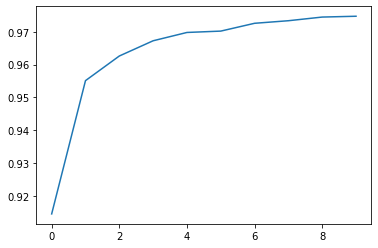

In [17]:
plt.plot(history.history['sparse_categorical_accuracy'])

In [18]:
model.get_weights()

[array([[ 0.00889026, -0.0030211 ,  0.03071867, ..., -0.01088009,
         -0.0136404 ,  0.05459377],
        [-0.05857963, -0.02964149, -0.06309627, ...,  0.02422049,
         -0.03561468, -0.04155541],
        [ 0.0001718 , -0.02304603, -0.04338349, ..., -0.00666881,
         -0.03412891,  0.02893446],
        ...,
        [-0.05976527,  0.04200437,  0.02497742, ..., -0.02471066,
          0.02252388,  0.00302903],
        [-0.03067362, -0.02917083,  0.05967008, ..., -0.04005911,
          0.01638386,  0.0127141 ],
        [-0.03472575, -0.00940373, -0.04818913, ..., -0.01827303,
         -0.05979789, -0.00327574]], dtype=float32),
 array([-5.14700729e-03, -1.15605146e-02, -1.03338636e-01,  1.62124448e-02,
        -4.50195745e-02, -4.47964929e-02, -3.60485762e-02, -3.38251702e-02,
         2.15574633e-02, -4.12617438e-02, -8.32693800e-02, -1.97488144e-02,
        -5.25071733e-02,  3.35607072e-03, -9.54154208e-02, -1.17623076e-01,
        -3.50066535e-02, -7.98847452e-02, -7.34844953e

In [19]:
loss , accuracy = model.evaluate(x_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4902 - sparse_categorical_accuracy: 0.9708


In [20]:
print(accuracy)

0.97079998254776


In [21]:
print(loss)

1.490220069885254


In [22]:
model.save('digits_pred.h5')